In [7]:
import numpy as np
import torch.nn
from torch.utils.data import Dataset
from bbox_helper import generate_prior_bboxes, match_priors
from PIL import Image
import json
import os
from cityscape_datalist import *
from cityscape_dataset import *
from solver import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Set default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (35.0, 25.0)

%load_ext autoreload
%autoreload 2

imgs_dir = "cityscapes_samples"
labels_dir = "cityscapes_samples_labels"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


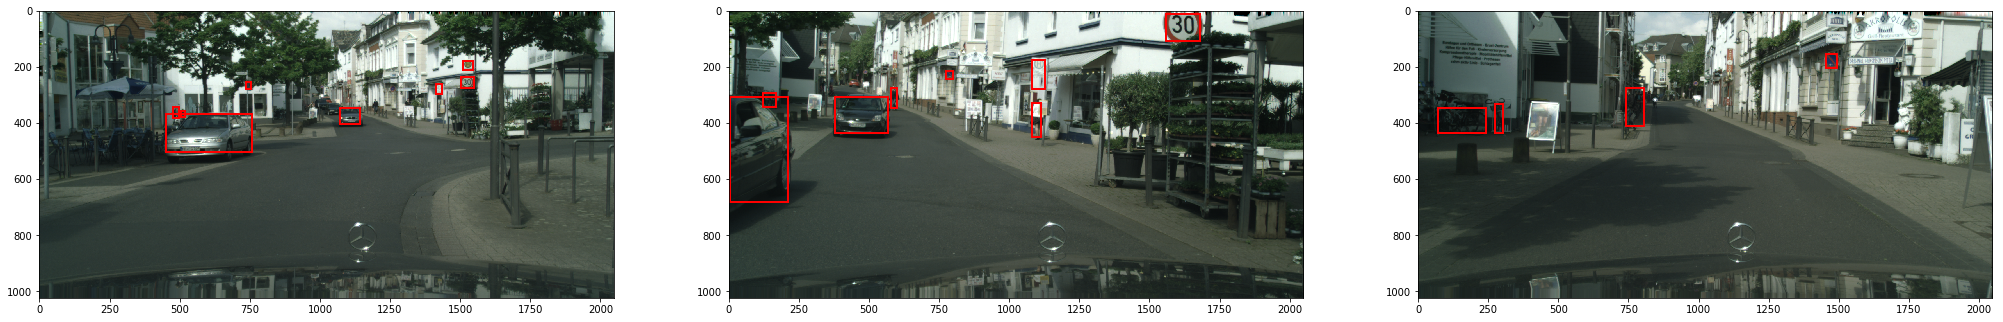

In [9]:
cs_data_list = CityScapeDatalist(imgs_dir, labels_dir)
cs_data_list.prepare_data_list()
num_sample_data = 3
sample_data = cs_data_list.data_list[:num_sample_data]

fig, ax = plt.subplots(1, num_sample_data)
for i in range(num_sample_data):
    img_path, labels = sample_data[i]["img_path"], sample_data[i]["labels"]
    img = Image.open(img_path)
    for item in labels:
        label, left_top, right_bottom = item["label"], item["left_top"], item["right_bottom"]
        if label in label_dict:
            ax[i].imshow(img)
            rect = patches.Rectangle(left_top, right_bottom[0] - left_top[0], right_bottom[1] - left_top[1], label=label, linewidth=2, edgecolor='r', facecolor='none')
            ax[i].add_patch(rect)
plt.show()


In [24]:
cs_data_list.split_data()

train_dataset = CityScapeDataset(cs_data_list.train_list)
valid_dataset = CityScapeDataset(cs_data_list.valid_list)